In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from joblib import dump
import myfunctions as mf

In [2]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,3,B
3,0,0,0,0,0,3,0,0,0,0,...,0,0,0,3,0,0,3,0,0,B
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [4]:
X = data_bs1.drop(['Group'], axis=1)
y = data_bs1['Group']

In [4]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [200, 300],
    'max_depth': [None, 15, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

model = RandomForestClassifier(criterion='entropy')
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  16.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  17.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  17.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.1s
[CV] END ma

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300)

In [12]:
best_params, best_score

({'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 300},
 0.9543779800606847)

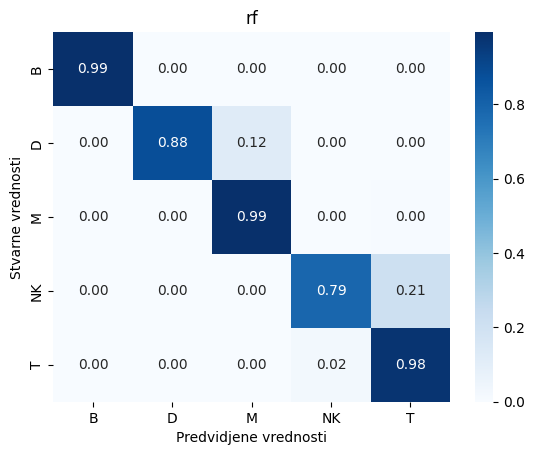

Matrica konfuzije:
 [[ 515    1    1    0    1]
 [   0   36    5    0    0]
 [   0    1  493    0    2]
 [   0    0    0  309   83]
 [   0    0    1   59 2448]]
Accuracy score:  0.9610619469026549
Precision score:  0.9602863915410338
Recall score:  0.9610619469026549
F1 score:  0.9605605930071384


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=300, random_state=55)

In [10]:
best_params = {'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 300}
best_model = RandomForestClassifier(**best_params, criterion='entropy')
mf.build_model(best_model, X_train, X_test, y_train, y_test, 'rf_test')

In [ ]:
dump(best_model, 'trained_models/rf.joblib')

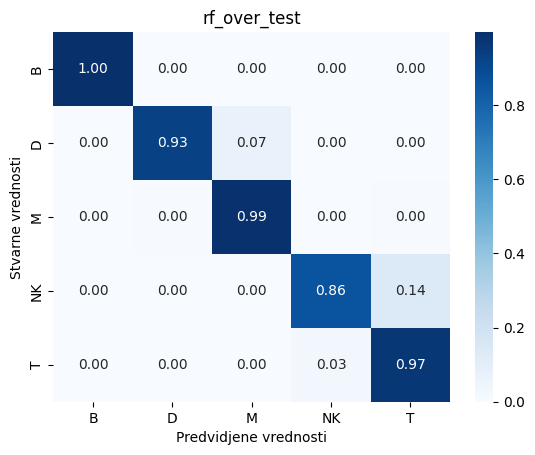

Matrica konfuzije:
 [[ 516    1    1    0    0]
 [   0   38    3    0    0]
 [   0    2  492    0    2]
 [   0    0    0  338   54]
 [   0    0    1   85 2422]]
Accuracy score:  0.9623261694058154
Precision score:  0.9637323410066453
Recall score:  0.9623261694058154
F1 score:  0.9628872211426215


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=300, random_state=55)

In [4]:
train_data = pd.read_csv('../data/oversampled_train_BS1.csv')
X_train = train_data.drop(['Group'], axis=1)
y_train = train_data['Group']
test_data = pd.read_csv('../data/oversampled_test_BS1.csv')
X_test = test_data.drop(['Group'], axis=1)
y_test = test_data['Group']
best_params = {
    'max_depth': 15,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 300
}
model_over = RandomForestClassifier(**best_params, criterion='entropy')
mf.build_model(model_over, X_train, X_test, y_train, y_test, 'rf_over_test')

In [ ]:
dump(model_over, 'trained_models/rf_over.joblib')